# Financial Analysis Trading System

## Module Structure

### 1. Standard Library Imports
* **System and OS Operations**
  * Path management
  * System configurations

### 2. Data Processing Libraries
* **pandas**
  * DataFrame operations
  * Time series analysis
* **numpy**
  * Numerical computations
  * Array operations

### 3. Financial Data
* **yfinance**
  * Stock market data retrieval
  * Historical price data
  * Company information

### 4. Visualization Tools
* **matplotlib**
  * Static plotting
  * Basic visualizations
* **seaborn**
  * Statistical visualization
  * Enhanced plotting styles
* **plotly**
  * Interactive charts
  * Real-time updates
* **mplfinance**
  * Candlestick charts
  * Technical analysis plots

### 5. Analysis Tools
* **ta (Technical Analysis)**
  * Technical indicators
  * Market analysis tools
* **TextBlob**
  * Sentiment analysis
  * Natural language processing

### 6. Web and Threading
* **requests**
  * API calls
  * Web data retrieval
* **threading**
  * Parallel processing
  * Concurrent operations

### 7. Custom Functions
* **Data Preprocessing Pipeline**
  * Data cleaning
  * Feature engineering
  * Data transformation

## Installation Requirements

```bash
pip install yfinance pandas numpy matplotlib seaborn plotly ta textblob
```

## Project Structure
Custom modules should be organized in the `src/` directory:

## Usage Guidelines

### Financial Analysis
* **Market Data**
  ```python
  # Using yfinance for stock data
  data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
  ```

* **Technical Indicators**
  ```python
  # Using ta library
  data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()
  ```

* **Sentiment Analysis**
  ```python
  # Using TextBlob for news sentiment
  sentiment = TextBlob(news_text).sentiment.polarity
  ```

### Visualization
* **Interactive Charts**
  ```python
  # Using plotly for candlestick chart
  fig = go.Figure(data=[go.Candlestick(x=df.index,
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'])])
  fig.show()
  ```

* **Technical Analysis Charts**
  ```python
  # Using mplfinance for advanced charts
  mpf.plot(data, type='candle', volume=True, style='charles')
  ```

* **Statistical Plots**
  ```python
  # Using seaborn for distribution analysis
  sns.histplot(data=df['Returns'], kde=True)
  ```

## Complete Example

```python
# Load and process data
df = load_data("path_to/csv")
df = clean_data(df)
df = add_features(df)

# Create interactive visualization
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])
fig.update_layout(title='AAPL Stock Price',
                 yaxis_title='Price',
                 xaxis_title='Date')
fig.show()
```

## Notes
* Ensure all dependencies are installed before running the code
* Check data quality before processing
* Monitor system resources when running parallel operations
* Consider using environment variables for sensitive information
* Regularly update packages for security and feature improvements

# Step 1: Import necessary libraries

In [1]:
# Standard library imports
import sys
import os
sys.path.append(os.path.abspath("../"))  # Add parent directory to Python path for module imports

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf
# ARIMA imports
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# Prophet imports
from prophet import Prophet

# Custom modules
from src.data_preprocessing import (
    load_data,      # Function to load financial data
    clean_data,     # Function to clean and preprocess data
    add_features,    # Function to add technical indicators
    add_target
)

# Suppress warnings
import warnings
warnings.simplefilter("ignore")  # Ignore warnings for cleaner output

# Step 2: Load and Process Data

#### Loading, Cleaning, and Feature Engineering

First, the stock price data for Apple (AAPL) is loaded from a CSV file located in the `../data/` directory.

```python
stock_file = "../data/AAPL_prices.csv"
df1 = load_data(stock_file)
```

In [2]:
aapl_file = "../data/AAPL_prices.csv"
msft_file = "../data/MSFT_prices.csv"
amzn_file = "../data/AMZN_prices.csv"

aapl_df = load_data(aapl_file)
msft_df = load_data(msft_file)
amzn_df = load_data(amzn_file)

aapl_df = clean_data(aapl_df)
msft_df = clean_data(msft_df)
amzn_df = clean_data(amzn_df)

aapl_df = add_features(aapl_df)
msft_df = add_features(msft_df)
amzn_df = add_features(amzn_df)

aapl_df = aapl_df.reset_index()
msft_df = msft_df.reset_index()
amzn_df = amzn_df.reset_index()

aapl_df = aapl_df.drop(columns=['index'])
msft_df = msft_df.drop(columns=['index'])
amzn_df = amzn_df.drop(columns=['index'])

aapl_df['Symbol'] = 'AAPL'
msft_df['Symbol'] = 'MSFT'
amzn_df['Symbol'] = 'AMZN'

aapl_df.head()

Date      Close       High        Low       Open     Volume   Returns  \
0 2012-06-01  16.900764  17.252042  16.886606  17.146900  520987600       NaN   
1 2012-06-04  17.000189  17.096896  16.524490  16.916136  556995600  0.005883   
2 2012-06-05  16.956205  17.065867  16.820636  16.909208  388214400 -0.002587   
3 2012-06-06  17.216194  17.288196  17.036638  17.105026  401455600  0.015333   
4 2012-06-07  17.224022  17.392730  17.187267  17.391828  379766800  0.000455   

   MA_20  MA_50  MA_200  ...  Bollinger_Upper  Bollinger_Lower  ATR  \
0    NaN    NaN     NaN  ...              NaN              NaN  NaN   
1    NaN    NaN     NaN  ...              NaN              NaN  NaN   
2    NaN    NaN     NaN  ...              NaN              NaN  NaN   
3    NaN    NaN     NaN  ...              NaN              NaN  NaN   
4    NaN    NaN     NaN  ...              NaN              NaN  NaN   

           OBV  Stochastic_%K  Stochastic_%D  ROC  Volatility  Momentum  \
0          0.0            NaN            NaN  NaN         NaN       NaN   
1  556995600.0            NaN            NaN  NaN         NaN       NaN   
2  168781200.0            NaN            NaN  NaN         NaN       NaN   
3  570236800.0            NaN            NaN  NaN         NaN       NaN   
4  950003600.0            NaN            NaN  NaN         NaN  0.323257   

   Symbol  
0    AAPL  
1    AAPL  
2    AAPL  
3    AAPL  
4    AAPL  

[5 rows x 28 columns]

In [3]:
# Ensure 'Date' is a datetime column and sort by date
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

In [6]:
combined_data = pd.concat([aapl_df, msft_df, amzn_df])

In [16]:
# Fill missing values if any
combined_data.fillna(method='ffill', inplace=True)

# Ensure all data is properly aligned by date
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data = combined_data.sort_values(['Symbol', 'Date'])
combined_data = add_target(combined_data)
combined_data = combined_data.fillna(0)

# Step 3: Exploratory Data Analysis (EDA)

#### Animated Candlestick Chart

Plots the last 200 candlesticks with 10 & 20-day moving averages. Updates every 5 minutes.

In [17]:
# Split data for each stock
def prepare_model_data(df):
    # Select features and target
    X = df.drop(columns=['Target', 'Date', 'Symbol'], axis=1)
    y = df['Target']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Time-based split (more appropriate for time series)
    tscv = TimeSeriesSplit(n_splits=5)
    return X_scaled, y, tscv

# Build models for each stock
def build_models(symbol, df):
    X, y, tscv = prepare_model_data(df)
    
    # Linear Regression model
    lr_model = LinearRegression()
    lr_scores = []
    
    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_scores = []
    
    # Cross-validation
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train and evaluate Linear Regression
        lr_model.fit(X_train, y_train)
        lr_pred = lr_model.predict(X_test)
        lr_scores.append(mean_squared_error(y_test, lr_pred))
        
        # Train and evaluate Random Forest
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)
        rf_scores.append(mean_squared_error(y_test, rf_pred))
    
    return {
        'symbol': symbol,
        'lr_model': lr_model,
        'lr_mse': np.mean(lr_scores),
        'rf_model': rf_model,
        'rf_mse': np.mean(rf_scores)
    }

In [18]:
stocks = ['AAPL', 'AMZN', 'MSFT'] # Train models for each stock
model_results = {}
for stock in stocks:
    stock_df = combined_data[combined_data['Symbol'] == stock]
    model_results[stock] = build_models(stock, stock_df)

# Compare model performance across stocks
performance_df = pd.DataFrame({
    'Stock': [result['symbol'] for result in model_results.values()],
    'Linear Regression MSE': [result['lr_mse'] for result in model_results.values()],
    'Random Forest MSE': [result['rf_mse'] for result in model_results.values()]
})

# Display performance comparison
performance_df.set_index('Stock', inplace=True)
print(performance_df)

       Linear Regression MSE  Random Forest MSE
Stock                                          
AAPL                0.000385           0.000614
AMZN                0.000498           0.000655
MSFT                0.000352           0.000532


<Figure size 1200x600 with 0 Axes>

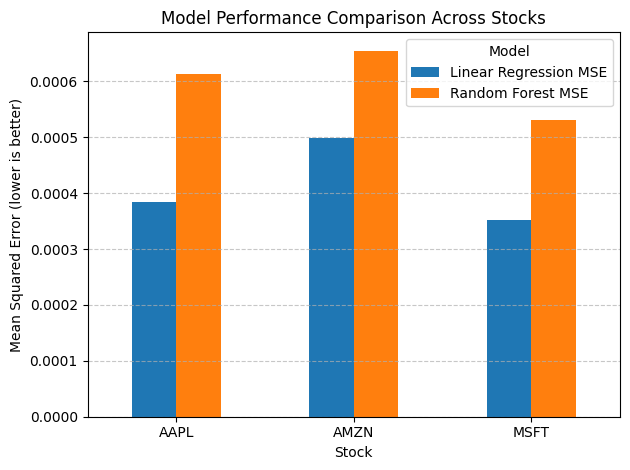

In [19]:
# Visualize model performance comparison
plt.figure(figsize=(12, 6))
performance_df.plot(kind='bar')
plt.title('Model Performance Comparison Across Stocks')
plt.ylabel('Mean Squared Error (lower is better)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

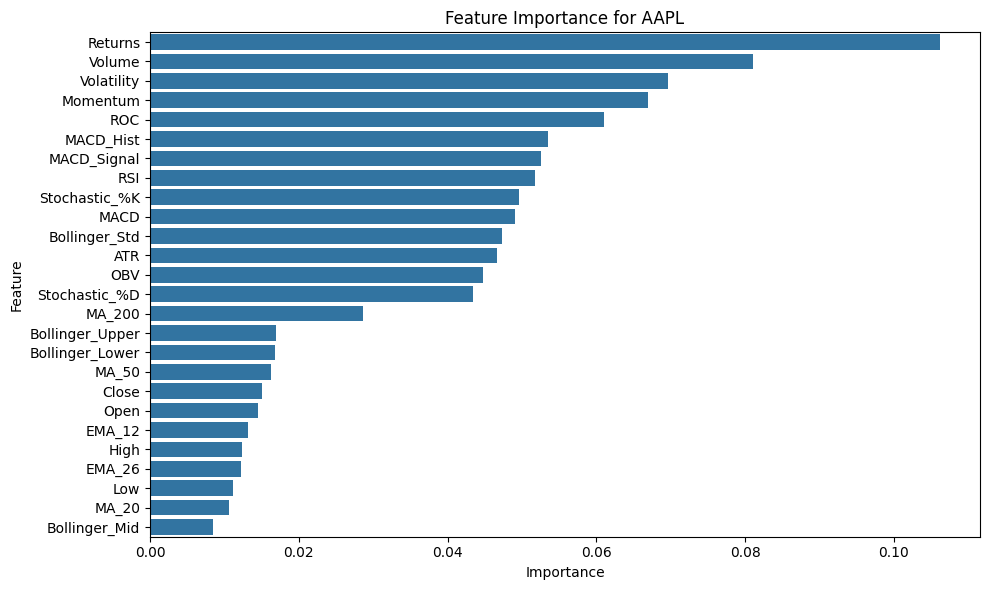

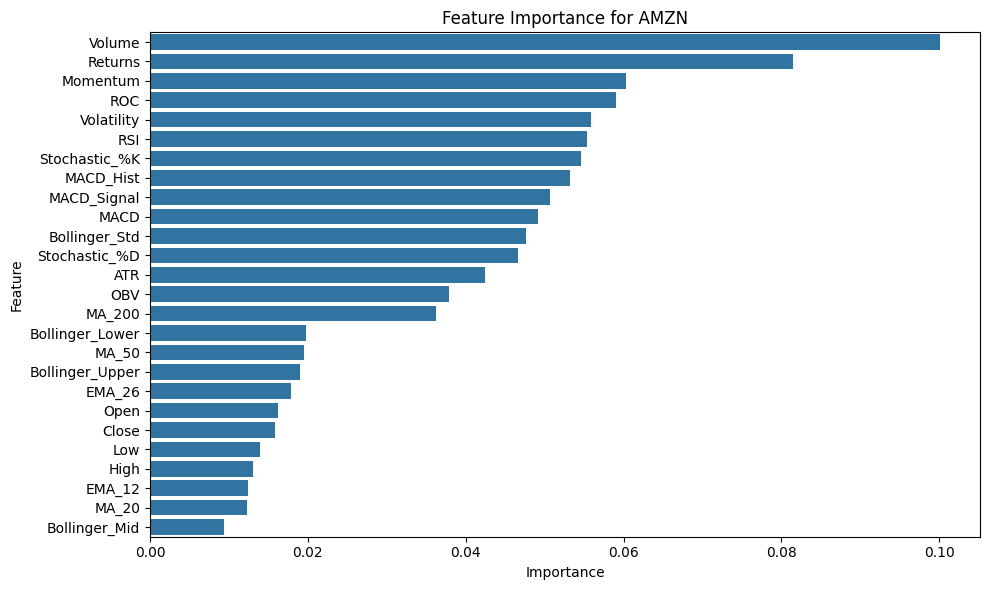

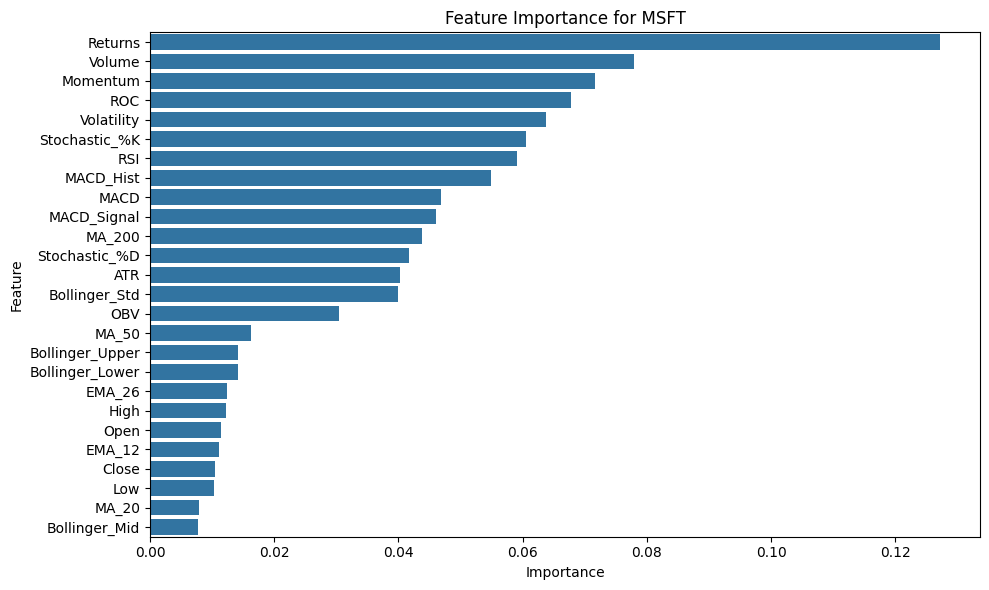

In [20]:
# Feature importance analysis for Random Forest models
def plot_feature_importance(stock_symbol, model, df):
    # Get feature names
    df = df.drop(columns=['Target', 'Date', 'Symbol'], axis=1)
    features = list(df.columns)
    
    # Get feature importances
    importances = model.feature_importances_
    
    # Create DataFrame for plotting
    feature_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f'Feature Importance for {stock_symbol}')
    plt.tight_layout()
    plt.show()

# Plot feature importance for each stock
for stock in stocks:
    plot_feature_importance(stock, model_results[stock]['rf_model'], combined_data)

In [21]:
# Conclusion
def get_best_model_for_stock(stock_results):
    if stock_results['lr_mse'] < stock_results['rf_mse']:
        return 'Linear Regression', stock_results['lr_mse']
    else:
        return 'Random Forest', stock_results['rf_mse']

# Print summary
print("Stock Prediction Model Summary:")
print("=" * 50)
for stock, results in model_results.items():
    best_model, best_score = get_best_model_for_stock(results)
    print(f"{stock}: Best model is {best_model} with MSE of {best_score:.6f}")

Stock Prediction Model Summary:
AAPL: Best model is Linear Regression with MSE of 0.000385
AMZN: Best model is Linear Regression with MSE of 0.000498
MSFT: Best model is Linear Regression with MSE of 0.000352


In [22]:
# Function to test stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    return result[1] < 0.05  # Return True if p-value < 0.05 (stationary)

# Function to build ARIMA model for each stock
def build_arima_model(stock_symbol, stock_df):
    # Use close price for ARIMA modeling
    close_series = stock_df.set_index('Date')['Close']
    
    # Check stationarity
    is_stationary = test_stationarity(close_series)
    if not is_stationary:
        # If not stationary, use differencing
        close_series = close_series.diff().dropna()
    
    # Split into train and test (last 60 days for testing)
    train_size = len(close_series) - 60
    train_data = close_series[:train_size]
    test_data = close_series[train_size:]
    
    # Fit ARIMA model - using a simple (1,1,1) order for simplicity
    # In practice, you'd use auto_arima or grid search for optimal parameters
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    
    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))
    
    # Calculate MSE
    mse = mean_squared_error(test_data, predictions)
    
    return {
        'symbol': stock_symbol,
        'arima_model': model_fit,
        'arima_mse': mse
    }

# Run ARIMA model for each stock
arima_results = {}
for stock in stocks:
    stock_df = combined_data[combined_data['Symbol'] == stock].copy()
    try:
        arima_results[stock] = build_arima_model(stock, stock_df)
        print(f"ARIMA model built for {stock}")
    except Exception as e:
        print(f"Error building ARIMA model for {stock}: {e}")

ARIMA model built for AAPL
ARIMA model built for AMZN
ARIMA model built for MSFT


In [23]:
# Function to build Prophet model for each stock
def build_prophet_model(stock_symbol, stock_df):
    # Prepare data for Prophet (requires 'ds' for dates and 'y' for target)
    prophet_df = stock_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Split into train and test (last 60 days for testing)
    train_size = len(prophet_df) - 60
    train_data = prophet_df[:train_size]
    test_data = prophet_df[train_size:]
    
    # Create and fit Prophet model
    model = Prophet(daily_seasonality=True)
    model.fit(train_data)
    
    # Make predictions
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)
    
    # Extract predictions for test period
    predictions = forecast.tail(len(test_data))['yhat'].values
    
    # Calculate MSE
    mse = mean_squared_error(test_data['y'].values, predictions)
    
    return {
        'symbol': stock_symbol,
        'prophet_model': model,
        'prophet_mse': mse
    }

# Run Prophet model for each stock
prophet_results = {}
for stock in stocks:
    stock_df = combined_data[combined_data['Symbol'] == stock].copy()
    try:
        prophet_results[stock] = build_prophet_model(stock, stock_df)
        print(f"Prophet model built for {stock}")
    except Exception as e:
        print(f"Error building Prophet model for {stock}: {e}")

02:04:17 - cmdstanpy - INFO - Chain [1] start processing
02:04:19 - cmdstanpy - INFO - Chain [1] done processing
02:04:19 - cmdstanpy - INFO - Chain [1] start processing


Prophet model built for AAPL


02:04:21 - cmdstanpy - INFO - Chain [1] done processing
02:04:22 - cmdstanpy - INFO - Chain [1] start processing


Prophet model built for AMZN


02:04:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet model built for MSFT


#### Seasonality in Monthly Returns

This section analyzes the seasonal trends in stock returns by computing average monthly returns.

##### Compute Monthly Returns
The dataset is grouped by month to calculate the average return for each month.

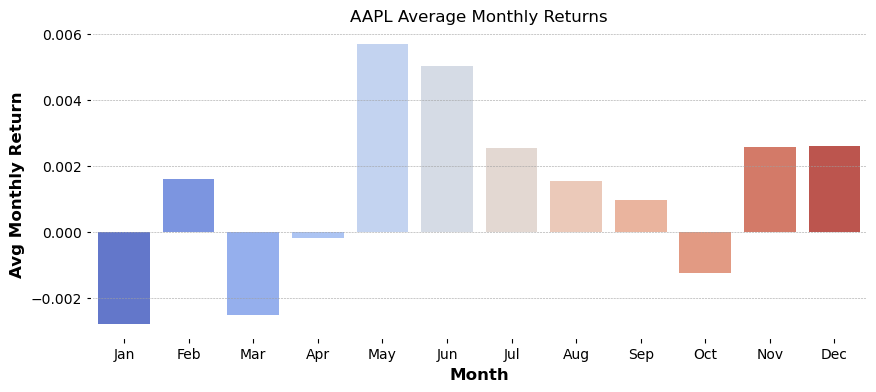

In [9]:
# Seasonality in Monthly Returns
df["Month"] = df.index.month
monthly_returns = df.groupby("Month")["Returns"].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_returns.index, y=monthly_returns.values, palette="coolwarm")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title(f"{ticker} Average Monthly Returns")
plt.ylabel("Avg Monthly Return")
plt.show()


#### Cumulative Returns (Stock Growth Over Time)

This section tracks the cumulative returns of the stock, providing insights into its long-term performance.

##### Compute Cumulative Returns
Cumulative returns are calculated by taking the cumulative product of (1 + daily returns).

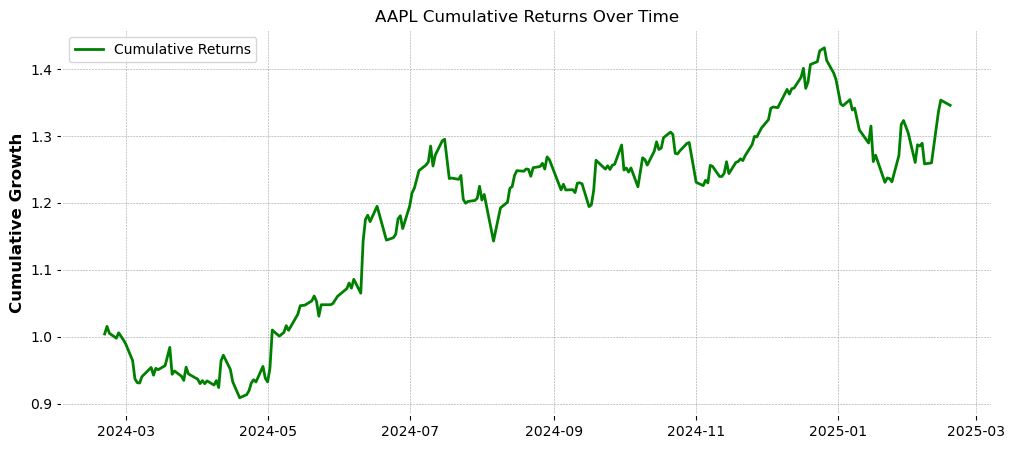

In [10]:
# Cumulative Returns (Stock Growth Over Time)
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Cumulative_Returns"], label="Cumulative Returns", color="green")
plt.title(f"{ticker} Cumulative Returns Over Time")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.show()


#### Maximum Drawdowns (Worst Stock Declines)

This section analyzes the worst declines in stock price by calculating drawdowns, helping to assess downside risk.

##### Compute Drawdowns
Drawdowns measure the percentage decline from the highest stock price observed up to that point.


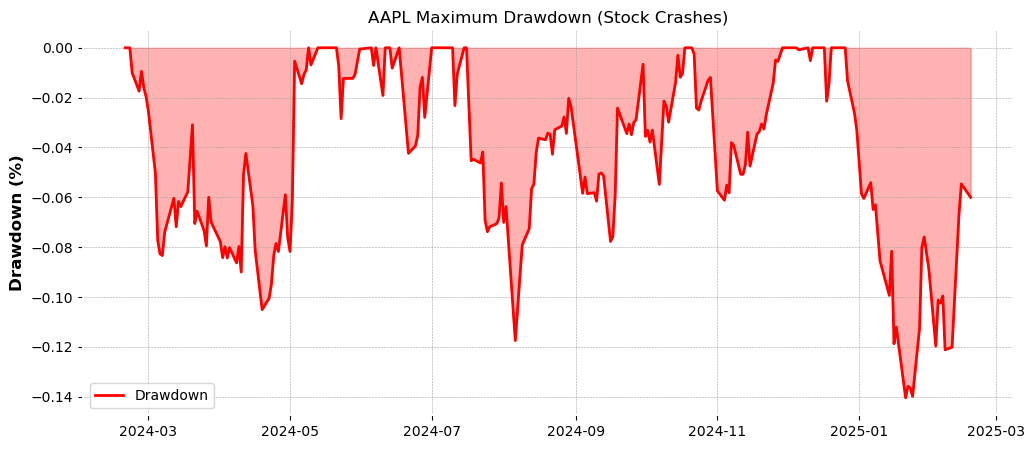

In [11]:
# Maximum Drawdowns (Worst Stock Declines)
df["Cumulative_Max"] = df["Close"].cummax()  # Running max of stock price
df["Drawdown"] = (df["Close"] - df["Cumulative_Max"]) / df["Cumulative_Max"]

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Drawdown"], label="Drawdown", color="red")
plt.fill_between(df.index, df["Drawdown"], color="red", alpha=0.3)
plt.title(f"{ticker} Maximum Drawdown (Stock Crashes)")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.show()

#### Autocorrelation of Returns (Predictability of Past Returns)

This section examines whether past returns influence future returns using an autocorrelation plot.

##### Plot Autocorrelation of Returns
The autocorrelation function (ACF) helps determine if stock returns exhibit patterns over time.

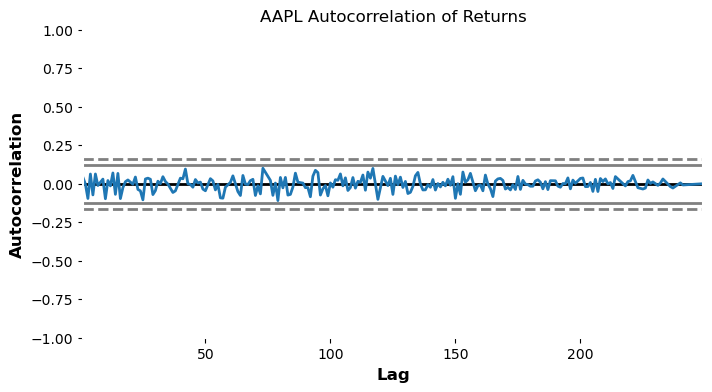

In [12]:
# Autocorrelation of Returns (Predictability of Past Returns)
plt.figure(figsize=(8, 4))
autocorrelation_plot(df["Returns"].dropna())
plt.title(f"{ticker} Autocorrelation of Returns")
plt.show()

#### Intraday Price Movement (If Intraday Data Available)

This analysis examines volatility patterns within the trading day, helping to identify the most volatile hours.

##### Check for Intraday Data
The median time difference between data points is used to determine if the dataset contains intraday data.


In [13]:
# Intraday Price Movement (If Intraday Data Available)
if df.index.to_series().diff().dt.total_seconds().median() <= 3600:  # If median time difference ≤ 1 hour
    df["Hour"] = df.index.hour
    intraday_volatility = df.groupby("Hour")["Returns"].std()

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=intraday_volatility.index, y=intraday_volatility.values, color="purple")
    plt.xticks(range(24), [f"{h}:00" for h in range(24)])
    plt.title(f"{ticker} Intraday Volatility Patterns")
    plt.ylabel("Volatility")
    plt.show()


#### Heatmap of Daily Returns (Detect Patterns Over Time)

This visualization highlights daily return trends across months to identify patterns in stock performance.

##### Data Preparation
- Extract **day** and **month** from the index to organize returns in a calendar-like format.
- Drop NaN values in the "Returns" column to ensure smooth visualization.

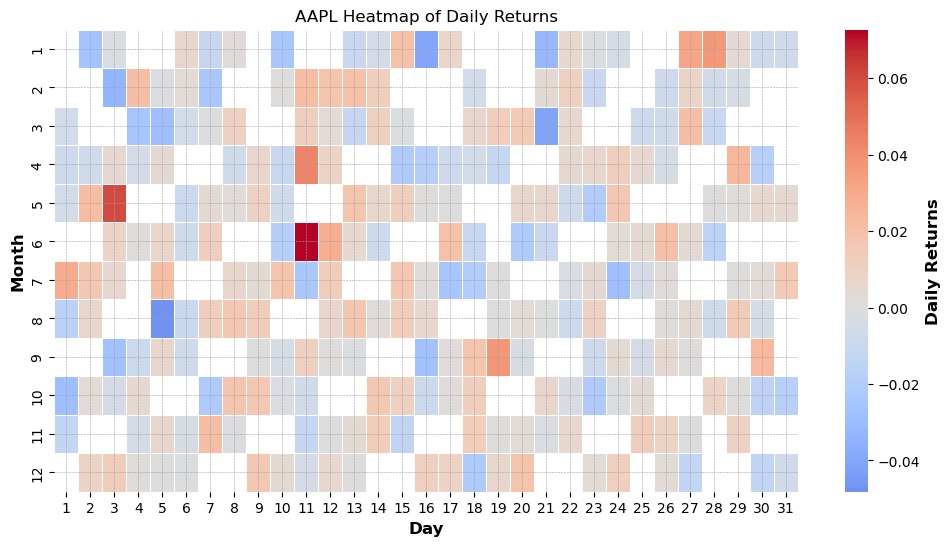

In [14]:
# Heatmap of Daily Returns (Detect Patterns Over Time)
df["Day"] = df.index.day
df["Month"] = df.index.month

# Ensure no NaN values in returns
df_filtered = df.dropna(subset=["Returns"])

# Create pivot table correctly
returns_pivot = df_filtered.pivot(index="Month", columns="Day", values="Returns")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(returns_pivot, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': "Daily Returns"})
plt.title(f"{ticker} Heatmap of Daily Returns")
plt.show()


# Step 4: Technical Analysis

#### Compute Technical Indicators

This section calculates various technical indicators used in stock analysis to assess trends, momentum, volatility, and trading signals.

##### Trend Indicators:
- **Simple Moving Averages (SMA)**
  - 20-day SMA: Short-term trend
  - 50-day SMA: Medium-term trend

In [15]:
# Compute Technical Indicators
df["SMA_20"] = ta.trend.sma_indicator(df["Close"], window=20)
df["SMA_50"] = ta.trend.sma_indicator(df["Close"], window=50)
df["RSI"] = ta.momentum.rsi(df["Close"], window=14)
df["MACD"] = ta.trend.macd(df["Close"])
df["MACD_Signal"] = ta.trend.macd_signal(df["Close"])
df["BB_Upper"] = ta.volatility.bollinger_hband(df["Close"], window=20, window_dev=2)
df["BB_Lower"] = ta.volatility.bollinger_lband(df["Close"], window=20, window_dev=2)

df["ATR"] = ta.volatility.average_true_range(df["High"], df["Low"], df["Close"], window=14)  # Volatility
df["VWAP"] = (df["Volume"] * df["Close"]).cumsum() / df["Volume"].cumsum()  # Volume-Weighted Average Price
df["ADX"] = ta.trend.adx(df["High"], df["Low"], df["Close"], window=14)  # Trend Strength
df["Stochastic_K"] = ta.momentum.stoch(df["High"], df["Low"], df["Close"], window=14)
df["Stochastic_D"] = df["Stochastic_K"].rolling(window=3).mean()

# Advanced Candlestick Chart with Indicators
df["Trend"] = np.where(df["Close"] > df["SMA_50"], "Uptrend", "Downtrend")
colors = ["green" if trend == "Uptrend" else "red" for trend in df["Trend"]]

#### Candlestick Chart with Indicators (mplfinance)

This section visualizes stock price movements using a **candlestick chart** along with key technical indicators.

##### Chart Components:
- **Candlestick Chart**: Represents price action over time.
- **20-Day SMA (Blue)**: Short-term trend indicator.
- **50-Day SMA (Red)**: Medium-term trend indicator.
- **Bollinger Bands (Dashed Gray)**: Upper and lower price volatility bands.
- **VWAP (Purple Dashed Line)**: Reflects the average price based on trading volume.


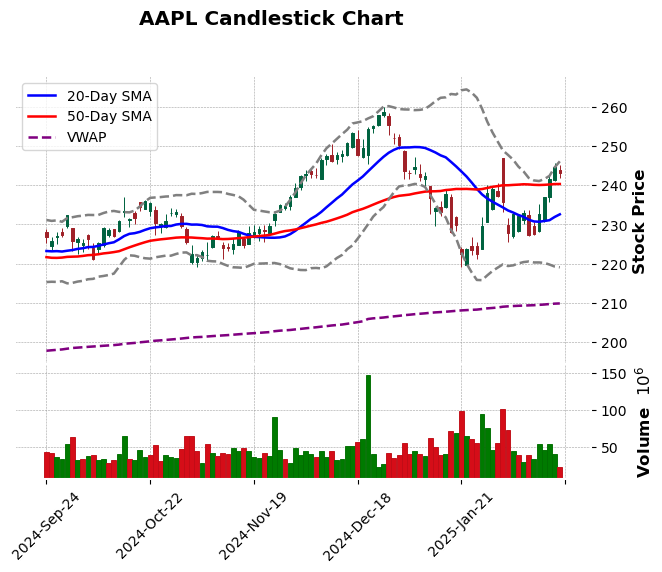

In [16]:
# Candlestick Chart with Indicators (mplfinance)
mpf.plot(df.tail(100), type="candle", style="charles",
         title=f"{ticker} Candlestick Chart",
         ylabel="Stock Price",
         volume=True,
         addplot=[
             mpf.make_addplot(df["SMA_20"].tail(100), color="blue", label="20-Day SMA"),
             mpf.make_addplot(df["SMA_50"].tail(100), color="red", label="50-Day SMA"),
             mpf.make_addplot(df["BB_Upper"].tail(100), color="gray", linestyle="dashed"),
             mpf.make_addplot(df["BB_Lower"].tail(100), color="gray", linestyle="dashed"),
             mpf.make_addplot(df["VWAP"].tail(100), color="purple", linestyle="dashed", label="VWAP")
         ])

#### RSI Indicator

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements.

##### Chart Components:
- **RSI Line (Purple)**: Represents the RSI values over time.
- **Overbought Level (70, Red Dashed Line)**: Indicates when the stock might be overbought and due for a pullback.
- **Oversold Level (30, Green Dashed Line)**: Indicates when the stock might be oversold and due for a rebound.

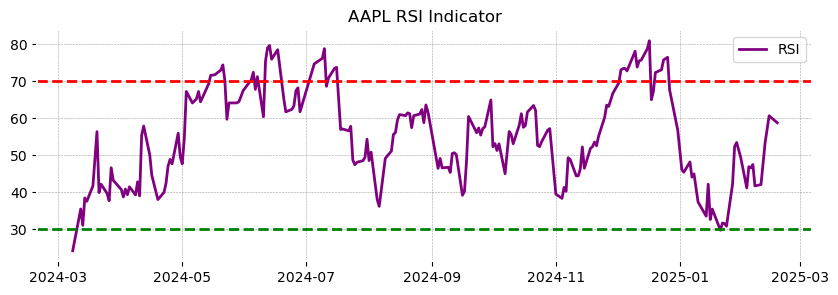

In [17]:
# RSI Indicator
plt.figure(figsize=(10, 3))
plt.plot(df.index, df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="dashed", color="red")  # Overbought level
plt.axhline(30, linestyle="dashed", color="green")  # Oversold level
plt.title(f"{ticker} RSI Indicator")
plt.legend()
plt.show()

#### MACD Indicator

The **Moving Average Convergence Divergence (MACD)** is a trend-following momentum indicator that shows the relationship between two moving averages of a stock’s price.

##### Chart Components:
- **MACD Line (Blue)**: The difference between the 12-day and 26-day Exponential Moving Averages (EMA).
- **Signal Line (Orange)**: The 9-day EMA of the MACD line, used to generate buy/sell signals.
- **Zero Line (Black Dashed Line)**: Indicates the centerline; positive values suggest bullish momentum, while negative values suggest bearish momentum.

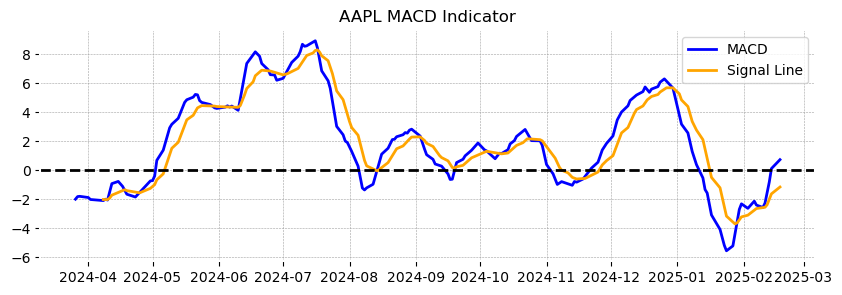

In [18]:
# MACD Indicator
plt.figure(figsize=(10, 3))
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["MACD_Signal"], label="Signal Line", color="orange")
plt.axhline(0, linestyle="dashed", color="black")
plt.title(f"{ticker} MACD Indicator")
plt.legend()
plt.show()

#### ATR & ADX Indicators (Volatility & Trend Strength)

The **ATR (Average True Range)** and **ADX (Average Directional Index)** are two key indicators for analyzing market volatility and trend strength.

##### **Average True Range (ATR)**
**Purpose**: Measures market volatility by calculating the average range between high and low prices over a given period.

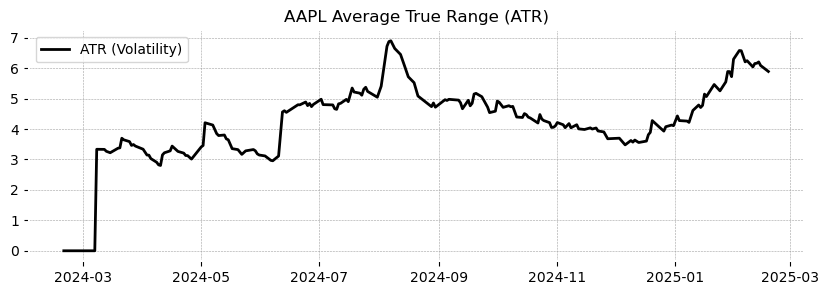

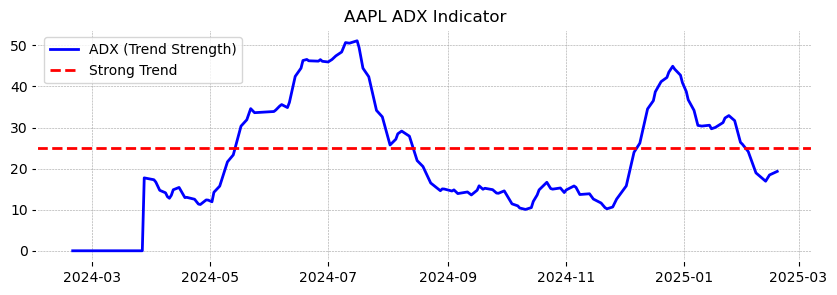

In [19]:
# ATR & ADX Indicators (Volatility & Trend Strength)
plt.figure(figsize=(10, 3))
plt.plot(df.index, df["ATR"], label="ATR (Volatility)", color="black")
plt.title(f"{ticker} Average True Range (ATR)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(df.index, df["ADX"], label="ADX (Trend Strength)", color="blue")
plt.axhline(25, linestyle="dashed", color="red", label="Strong Trend")
plt.title(f"{ticker} ADX Indicator")
plt.legend()
plt.show()

#### Stochastic Oscillator (Momentum Indicator)

The **Stochastic Oscillator** measures momentum by comparing a stock's closing price to its price range over a set period.


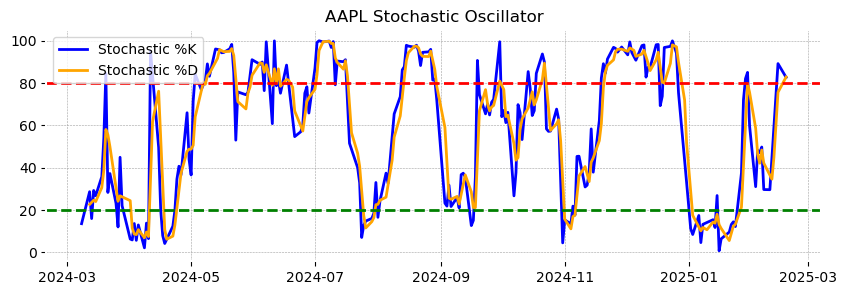

In [20]:
# Stochastic Oscillator (Momentum)
plt.figure(figsize=(10, 3))
plt.plot(df.index, df["Stochastic_K"], label="Stochastic %K", color="blue")
plt.plot(df.index, df["Stochastic_D"], label="Stochastic %D", color="orange")
plt.axhline(80, linestyle="dashed", color="red")  # Overbought
plt.axhline(20, linestyle="dashed", color="green")  # Oversold
plt.title(f"{ticker} Stochastic Oscillator")
plt.legend()
plt.show()



# Step 5: Fundamental Analysis

#### **Enhanced Fundamental Analysis (Financial Ratios & Revenue Trends)**

Company: Apple Inc.
Sector: Technology
Market Cap: $3,653,374,836,736
P/E Ratio: 38.54
EPS: $6.31
52-Week High: $260.10
52-Week Low: $164.08

Financial Performance:
             Total Revenue     Net Income
2024-09-30  391035000000.0  93736000000.0
2023-09-30  383285000000.0  96995000000.0
2022-09-30  394328000000.0  99803000000.0
2021-09-30  365817000000.0  94680000000.0


<Figure size 1000x400 with 0 Axes>

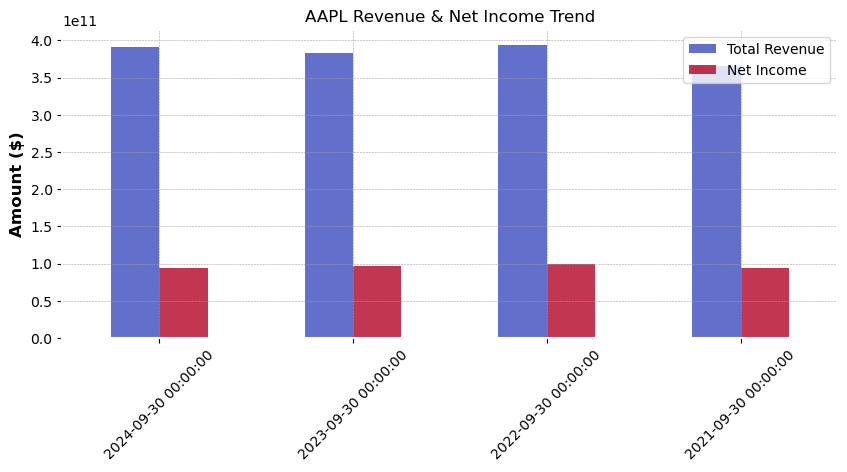

In [21]:
# Enhanced Fundamental Analysis (Financial Ratios & Revenue Trends)
stock_info = yf.Ticker(ticker).info
financials = yf.Ticker(ticker).financials  # Get financial statements
income_statement = financials.T.loc[:, ["Total Revenue", "Net Income"]].dropna()

print(f"Company: {stock_info.get('longName', 'N/A')}")
print(f"Sector: {stock_info.get('sector', 'N/A')}")
print(f"Market Cap: ${stock_info.get('marketCap', 0):,.0f}")
print(f"P/E Ratio: {stock_info.get('trailingPE', 0):.2f}")
print(f"EPS: ${stock_info.get('trailingEps', 0):.2f}")
print(f"52-Week High: ${stock_info.get('fiftyTwoWeekHigh', 0):.2f}")
print(f"52-Week Low: ${stock_info.get('fiftyTwoWeekLow', 0):.2f}")
print("\nFinancial Performance:")
print(income_statement)

# Revenue & Net Income Trend
plt.figure(figsize=(10, 4))
income_statement.plot(kind="bar", figsize=(10, 4), colormap="coolwarm", alpha=0.8)
plt.title(f"{ticker} Revenue & Net Income Trend")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.show()

# Step 6: Trading Strategies

#### **Momentum Trading Strategy**

##### **Overview**
Momentum trading capitalizes on the strength of a stock's recent price movement. This strategy identifies potential **buy** and **sell** signals based on past price changes.

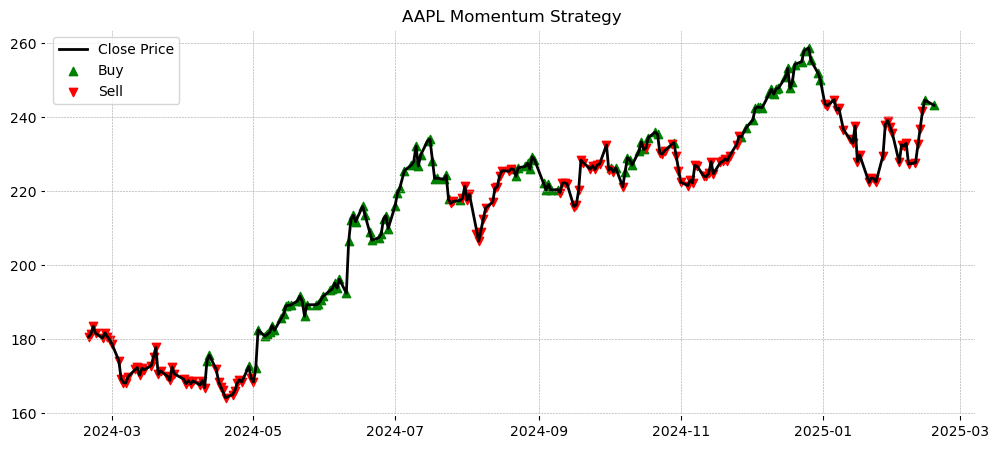

In [22]:
# Implement Momentum Strategy
def momentum_strategy(df, lookback=20, threshold=2):
    df["Momentum"] = df["Close"].pct_change(lookback)
    df["Signal"] = np.where(df["Momentum"] > threshold/100, 1, -1)
    return df

df = momentum_strategy(df)

# Plot Buy/Sell Signals
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Close Price", color="black")
plt.scatter(df.index[df["Signal"] == 1], df["Close"][df["Signal"] == 1], label="Buy", marker="^", color="green", alpha=1)
plt.scatter(df.index[df["Signal"] == -1], df["Close"][df["Signal"] == -1], label="Sell", marker="v", color="red", alpha=1)
plt.title(f"{ticker} Momentum Strategy")
plt.legend()
plt.show()

#### **Trading Strategies with Candlestick Charts & Indicators**

This cell implements and visualizes **four trading strategies** using **technical indicators** such as Moving Averages, Bollinger Bands, ADX, RSI, ATR, and VWAP. The results are displayed on candlestick charts with buy/sell signals.

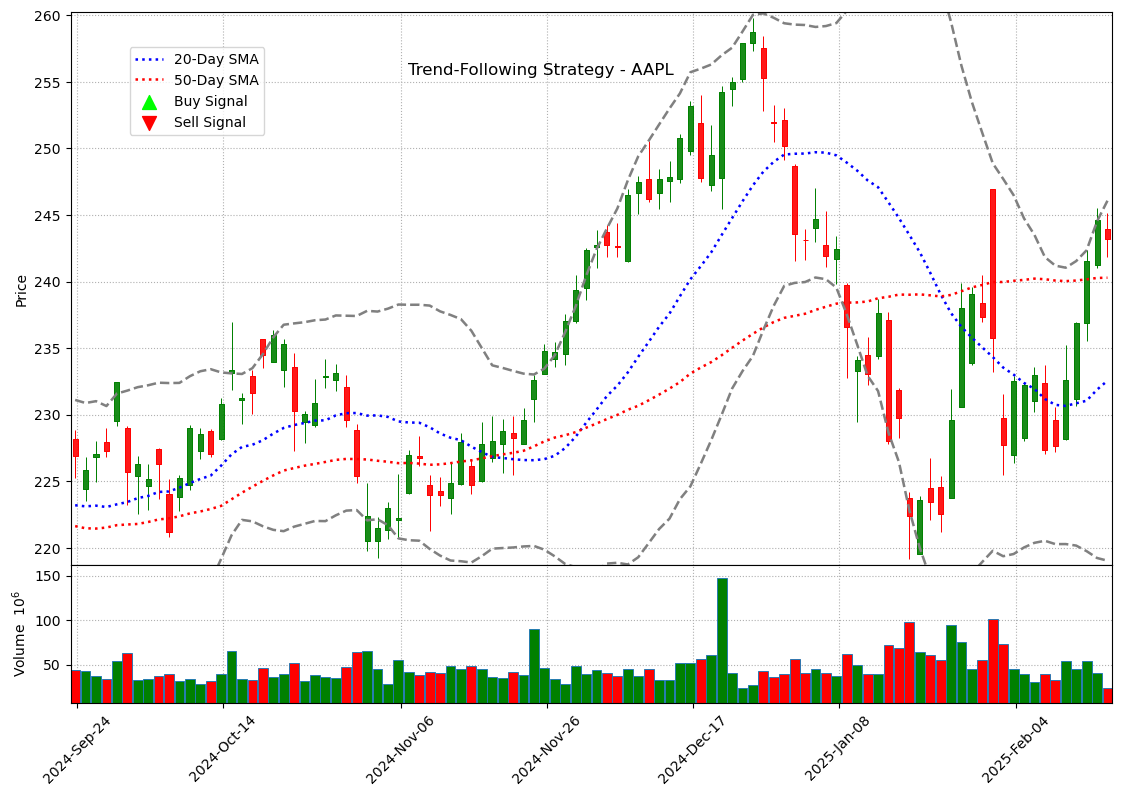

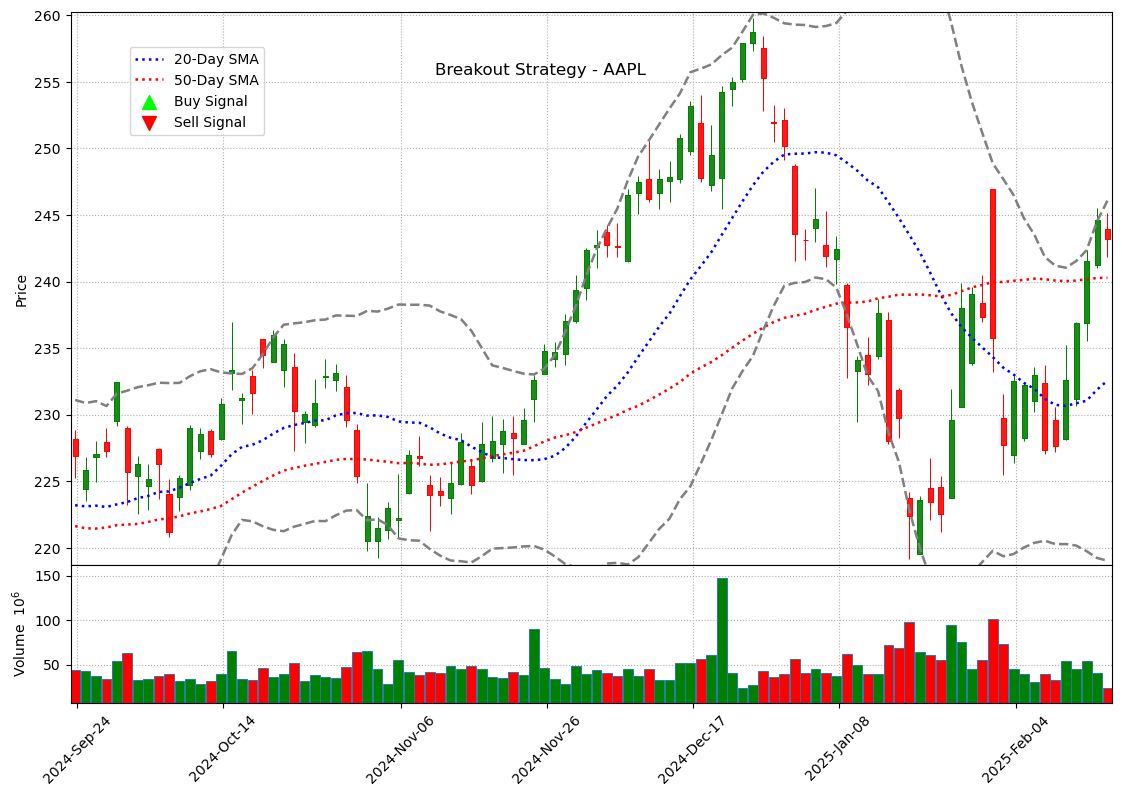

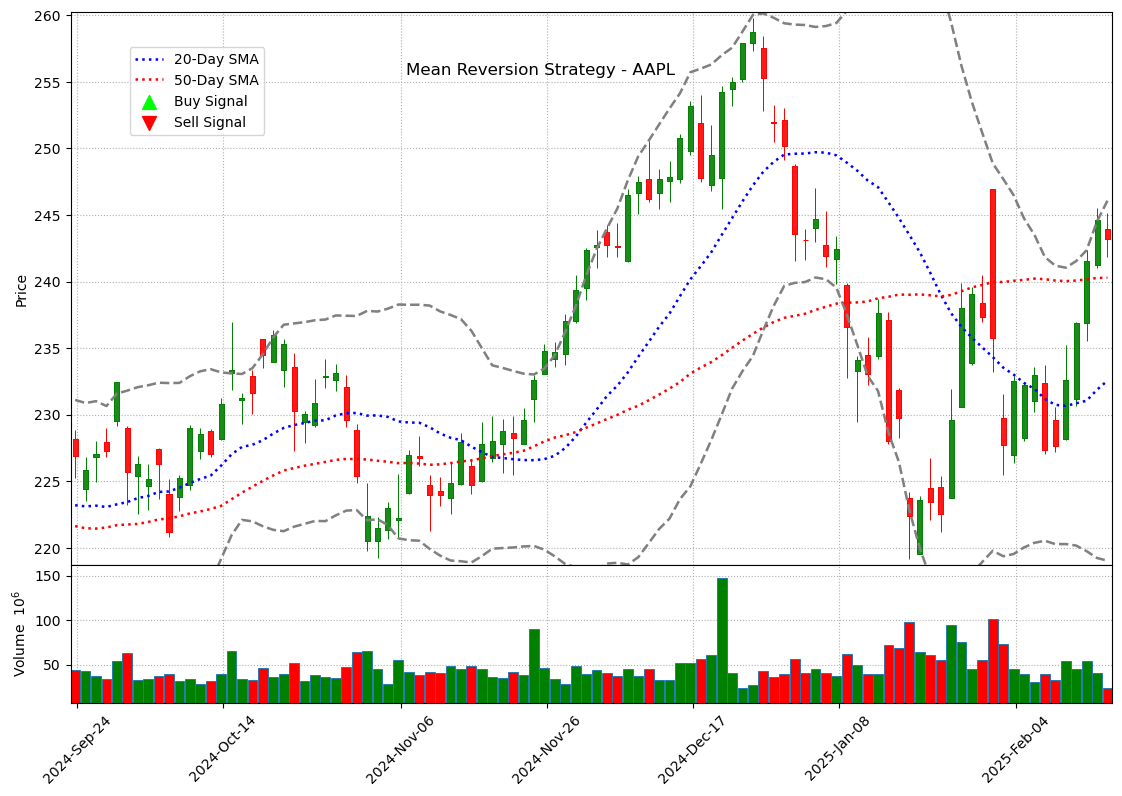

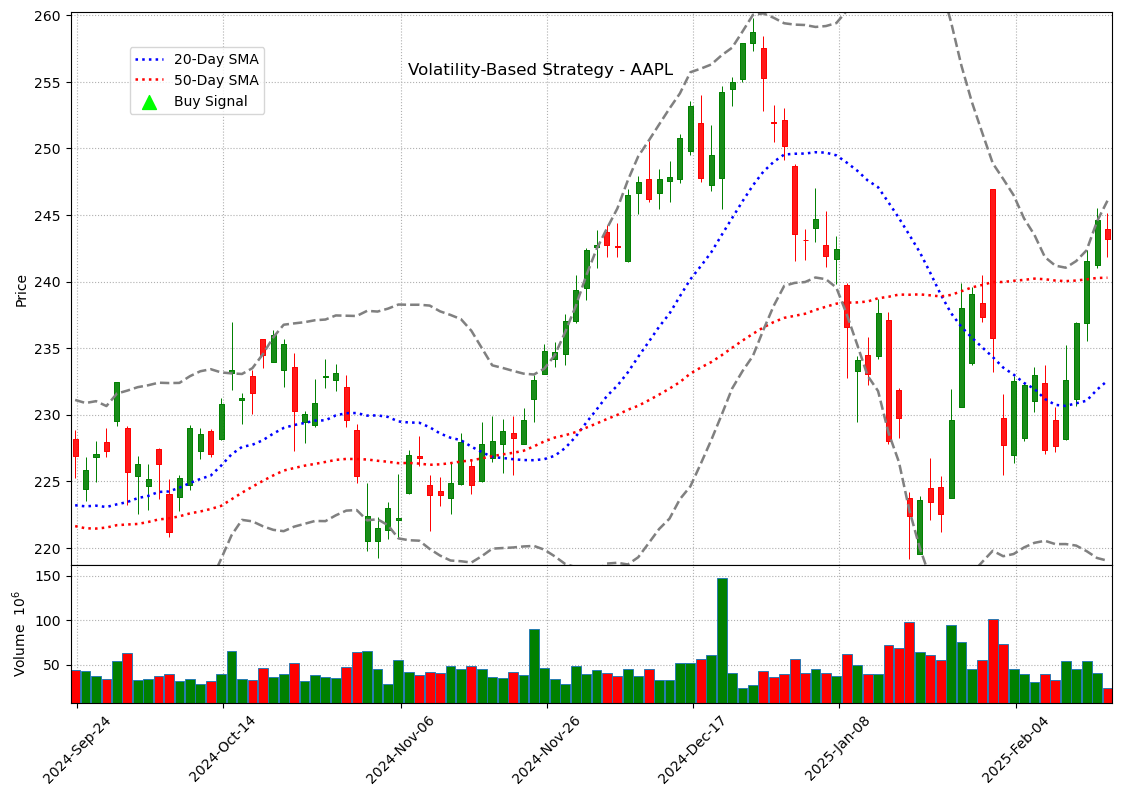

In [23]:
def plot_strategy(df, strategy_name):
    # Get last 100 rows for plotting
    plot_df = df.tail(100).copy()
    
    # Ensure the index is datetime and properly formatted
    if not isinstance(plot_df.index, pd.DatetimeIndex):
        plot_df.index = pd.to_datetime(plot_df.index)
    
    # Ensure data is in the correct format for mplfinance
    plot_df = plot_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
    
    # Get buy/sell signals from the plotted range
    buy_signals = plot_df[df.tail(100)["Signal"] == 1]
    sell_signals = plot_df[df.tail(100)["Signal"] == -1]
    
    # Create additional plots using the same date range
    add_plots = [
        mpf.make_addplot(df.tail(100)["SMA_20"], color="blue", linestyle="dotted", label="20-Day SMA"),
        mpf.make_addplot(df.tail(100)["SMA_50"], color="red", linestyle="dotted", label="50-Day SMA"),
        mpf.make_addplot(df.tail(100)["BB_Upper"], color="gray", linestyle="dashed"),
        mpf.make_addplot(df.tail(100)["BB_Lower"], color="gray", linestyle="dashed")
    ]
    
    # Set up the style
    mc = mpf.make_marketcolors(up='green', down='red',
                              edge='inherit',
                              wick='inherit',
                              volume='in',
                              ohlc='inherit')
    s = mpf.make_mpf_style(marketcolors=mc, gridstyle='dotted')
    
    # Create the figure with adjusted size and spacing
    fig, axes = mpf.plot(plot_df, 
                        type='candle',
                        style=s,
                        title=f"{strategy_name} - {ticker}",
                        ylabel='Price',
                        volume=True,
                        addplot=add_plots,
                        returnfig=True,
                        figsize=(12, 8),
                        panel_ratios=(4, 1),
                        tight_layout=True)
    
    # Add buy/sell signals
    ax = axes[0]
    if not buy_signals.empty:
        ax.scatter(buy_signals.index, buy_signals["Close"], 
                  marker="^", color="lime", s=100, label="Buy Signal")
    if not sell_signals.empty:
        ax.scatter(sell_signals.index, sell_signals["Close"], 
                  marker="v", color="red", s=100, label="Sell Signal")
    
    # Adjust legend
    ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
    
    # Rotate x-axis labels for better readability
    for ax in axes:
        if ax is not None:
            ax.tick_params(axis='x', rotation=45)
    
    # Adjust layout to prevent cutting off
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# Trend-Following Strategy (Moving Averages + ADX)
def trend_following_strategy(df, adx_threshold=25):
    df["Signal"] = 0
    df.loc[(df["SMA_20"] > df["SMA_50"]) & (df["ADX"] > adx_threshold), "Signal"] = 1  # Buy
    df.loc[(df["SMA_20"] < df["SMA_50"]) & (df["ADX"] > adx_threshold), "Signal"] = -1  # Sell
    return df

df = trend_following_strategy(df)
plot_strategy(df, "Trend-Following Strategy")

# Breakout Strategy (Bollinger Bands)
def breakout_strategy(df):
    df["Signal"] = 0
    df.loc[df["Close"] > df["BB_Upper"], "Signal"] = 1  # Buy
    df.loc[df["Close"] < df["BB_Lower"], "Signal"] = -1  # Sell
    return df

df = breakout_strategy(df)
plot_strategy(df, "Breakout Strategy")

# Mean Reversion Strategy (Bollinger Bands + RSI)
def mean_reversion_strategy(df):
    df["Signal"] = 0
    df.loc[(df["Close"] < df["BB_Lower"]) & (df["RSI"] < 30), "Signal"] = 1  # Buy (Oversold)
    df.loc[(df["Close"] > df["BB_Upper"]) & (df["RSI"] > 70), "Signal"] = -1  # Sell (Overbought)
    return df

df = mean_reversion_strategy(df)
plot_strategy(df, "Mean Reversion Strategy")

# Volatility-Based Strategy (ATR & VWAP)
def volatility_strategy(df, atr_multiplier=2):
    df["Signal"] = 0
    atr_threshold = df["ATR"] * atr_multiplier
    df.loc[df["Close"] > df["VWAP"] + atr_threshold, "Signal"] = 1  # Buy
    df.loc[df["Close"] < df["VWAP"] - atr_threshold, "Signal"] = -1  # Sell
    return df

df = volatility_strategy(df)
plot_strategy(df, "Volatility-Based Strategy")


# Step 7: Visualization & Insights

#### Trading Signal Visualization using Plotly

##### Function: `plot_trading_signals(df, ticker)`

###### Description
This function creates an interactive technical analysis dashboard using Plotly. It visualizes price movements, moving averages, Bollinger Bands, buy/sell signals, and volume data.

###### Parameters
- `df` (DataFrame): A Pandas DataFrame containing historical stock price data with the following columns:
  - `Open`: Opening price
  - `High`: Highest price
  - `Low`: Lowest price
  - `Close`: Closing price
  - `Volume`: Trading volume
  - `SMA_20`: 20-day Simple Moving Average
  - `SMA_50`: 50-day Simple Moving Average
  - `BB_Upper`: Upper Bollinger Band
  - `BB_Lower`: Lower Bollinger Band
  - `Signal`: Trading signals where `1` represents a buy signal and `-1` represents a sell signal.
  
- `ticker` (str): The stock ticker symbol to be displayed in the chart title.

###### Features
1. **Candlestick Chart**: Visualizes `Open`, `High`, `Low`, and `Close` prices.
2. **Moving Averages**:
   - 20-day SMA (blue line)
   - 50-day SMA (orange line)
3. **Bollinger Bands**:
   - Upper band (gray dashed line)
   - Lower band (gray dashed line with shaded fill)
4. **Buy & Sell Signals**:
   - Buy signals (`1`) shown as green upward triangles.
   - Sell signals (`-1`) shown as red downward triangles.
5. **Volume Bars**:
   - Green bars indicate higher closing price than opening price.
   - Red bars indicate lower closing price than opening price.
6. **Interactive Elements**:
   - Hovering over the chart displays price and volume details.
   - Legends are positioned for clarity.
   - The volume panel is positioned below the price chart.


In [24]:
def plot_trading_signals(df, ticker):
    # Create figure with secondary y-axis
    fig = make_subplots(rows=2, cols=1, 
                       shared_xaxes=True,
                       vertical_spacing=0.03,
                       subplot_titles=(f'{ticker} Price Action', 'Volume'),
                       row_heights=[0.7, 0.3])

    # Add candlestick chart
    fig.add_trace(
        go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name='OHLC'
        ),
        row=1, col=1
    )

    # Add Moving Averages
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['SMA_20'],
            name='20 SMA',
            line=dict(color='blue', width=1)
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['SMA_50'],
            name='50 SMA',
            line=dict(color='orange', width=1)
        ),
        row=1, col=1
    )

    # Add Bollinger Bands
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['BB_Upper'],
            name='BB Upper',
            line=dict(color='gray', width=1, dash='dash')
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['BB_Lower'],
            name='BB Lower',
            line=dict(color='gray', width=1, dash='dash'),
            fill='tonexty'
        ),
        row=1, col=1
    )

    # Add buy signals
    fig.add_trace(
        go.Scatter(
            x=df.index[df['Signal'] == 1],
            y=df['Low'][df['Signal'] == 1] * 0.99,  # Slightly below the candle
            name='Buy Signal',
            mode='markers',
            marker=dict(
                symbol='triangle-up',
                size=15,
                color='green',
                line=dict(color='black', width=1)
            )
        ),
        row=1, col=1
    )

    # Add sell signals
    fig.add_trace(
        go.Scatter(
            x=df.index[df['Signal'] == -1],
            y=df['High'][df['Signal'] == -1] * 1.01,  # Slightly above the candle
            name='Sell Signal',
            mode='markers',
            marker=dict(
                symbol='triangle-down',
                size=15,
                color='red',
                line=dict(color='black', width=1)
            )
        ),
        row=1, col=1
    )

    # Add volume bars
    colors = ['red' if row['Open'] > row['Close'] else 'green' for index, row in df.iterrows()]
    fig.add_trace(
        go.Bar(
            x=df.index,
            y=df['Volume'],
            name='Volume',
            marker_color=colors,
            opacity=0.5
        ),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        title=f'{ticker} Technical Analysis Dashboard',
        yaxis_title='Price',
        yaxis2_title='Volume',
        xaxis2_title='Date',
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        height=800,
        template='plotly_white',
        xaxis_rangeslider_visible=False
    )

    # Update y-axes labels
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="Volume", row=2, col=1)

    return fig

# Create and show the plot
fig = plot_trading_signals(df, ticker)
fig.show()

#### Trading Signals and Technical Indicators Visualization in Python

This script contains two main functions:  
1. `plot_trading_signals(df, ticker)`: Plots price action, moving averages, Bollinger Bands, and buy/sell signals.  
2. `plot_technical_indicators(df, ticker)`: Displays a comprehensive technical analysis dashboard with price action, volume, RSI, ADX, and MACD indicators.  

Both functions use **Plotly** for visualization and require a properly formatted DataFrame (`df`) with specific columns.

---

##### `plot_trading_signals(df, ticker)`
This function visualizes trading signals using candlestick charts, moving averages, Bollinger Bands, and buy/sell signals.

###### **Inputs:**
- `df`: Pandas DataFrame containing stock price data with required columns:
  - `Open`, `High`, `Low`, `Close` (OHLC)
  - `SMA_20`, `SMA_50` (Simple Moving Averages)
  - `BB_Upper`, `BB_Lower` (Bollinger Bands)
  - `Signal` (Buy/Sell signals where `1` = Buy, `-1` = Sell)
  - `Volume` (Trading volume)
- `ticker`: Stock ticker symbol (string).

###### **Plot Features:**
- **Candlestick chart** to display OHLC data.
- **20 SMA & 50 SMA** to show short and medium-term trends.
- **Bollinger Bands** to visualize volatility.
- **Buy signals** (green triangles) when `Signal == 1`.
- **Sell signals** (red triangles) when `Signal == -1`.
- **Volume bars** colored based on price movement.

In [25]:
def calculate_macd(df):
    """Calculate MACD indicators"""
    # Calculate MACD line
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    
    # Calculate Signal line
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Calculate MACD histogram
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']
    
    return df

def plot_technical_indicators(df, ticker):
    # First ensure MACD is calculated
    df = calculate_macd(df)
    
    # Create figure with secondary y-axis
    fig = make_subplots(rows=4, cols=1,
                       shared_xaxes=True,
                       vertical_spacing=0.03,
                       subplot_titles=(
                           f'{ticker} Price Action with Indicators',
                           'Volume',
                           'RSI & ADX',
                           'MACD'
                       ),
                       row_heights=[0.4, 0.2, 0.2, 0.2])

    # Add candlestick
    fig.add_trace(
        go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name='OHLC'
        ),
        row=1, col=1
    )

    # Add Moving Averages
    fig.add_trace(
        go.Scatter(x=df.index, y=df['SMA_20'], name='20 SMA',
                  line=dict(color='blue', width=1)),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=df.index, y=df['SMA_50'], name='50 SMA',
                  line=dict(color='orange', width=1)),
        row=1, col=1
    )

    # Add Bollinger Bands
    fig.add_trace(
        go.Scatter(x=df.index, y=df['BB_Upper'], name='BB Upper',
                  line=dict(color='gray', width=1, dash='dash')),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=df.index, y=df['BB_Lower'], name='BB Lower',
                  line=dict(color='gray', width=1, dash='dash'),
                  fill='tonexty'),
        row=1, col=1
    )

    # Add buy/sell signals
    fig.add_trace(
        go.Scatter(
            x=df.index[df['Signal'] == 1],
            y=df['Low'][df['Signal'] == 1] * 0.99,
            name='Buy Signal',
            mode='markers',
            marker=dict(symbol='triangle-up', size=15, color='green')
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=df.index[df['Signal'] == -1],
            y=df['High'][df['Signal'] == -1] * 1.01,
            name='Sell Signal',
            mode='markers',
            marker=dict(symbol='triangle-down', size=15, color='red')
        ),
        row=1, col=1
    )

    # Add Volume
    colors = ['red' if row['Open'] > row['Close'] else 'green' 
              for index, row in df.iterrows()]
    fig.add_trace(
        go.Bar(x=df.index, y=df['Volume'], name='Volume',
               marker_color=colors, opacity=0.5),
        row=2, col=1
    )

    # Add RSI and ADX
    fig.add_trace(
        go.Scatter(x=df.index, y=df['RSI'], name='RSI',
                  line=dict(color='purple', width=1)),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=df.index, y=df['ADX'], name='ADX',
                  line=dict(color='brown', width=1)),
        row=3, col=1
    )
    # Add RSI levels
    fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
    fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

    # Add MACD
    fig.add_trace(
        go.Scatter(x=df.index, y=df['MACD'], name='MACD',
                  line=dict(color='blue', width=1)),
        row=4, col=1
    )
    fig.add_trace(
        go.Scatter(x=df.index, y=df['MACD_Signal'], name='MACD Signal',
                  line=dict(color='orange', width=1)),
        row=4, col=1
    )
    
    # MACD Histogram as bars
    colors = ['red' if x < 0 else 'green' for x in df['MACD_Hist']]
    fig.add_trace(
        go.Bar(x=df.index, y=df['MACD_Hist'], name='MACD Histogram',
               marker_color=colors),
        row=4, col=1
    )

    # Update layout
    fig.update_layout(
        title=f'{ticker} Technical Analysis Dashboard',
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        height=1200,
        template='plotly_white',
        xaxis_rangeslider_visible=False
    )

    # Update y-axes labels
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="Volume", row=2, col=1)
    fig.update_yaxes(title_text="RSI/ADX", row=3, col=1)
    fig.update_yaxes(title_text="MACD", row=4, col=1)

    return fig


# First calculate MACD
df = calculate_macd(df)

# Then create and display the visualization
technical_fig = plot_technical_indicators(df, ticker)
technical_fig.show()

### Conclusion  

This analysis provides a comprehensive technical overview of stock market trends using indicators such as Moving Averages, Bollinger Bands, RSI, ADX, and MACD. By integrating these tools, we identified potential buy and sell signals, assessed market momentum, and evaluated overall trend strength. The combination of statistical modeling and visualization offers valuable insights for informed decision-making in trading and investment strategies.  

However, while technical analysis is a powerful tool, it should not be used in isolation. Market conditions, macroeconomic factors, and fundamental analysis must be considered to enhance reliability. No strategy guarantees future performance, and all investments carry inherent risks.  

### **Disclaimer:**  
This notebook is for educational and informational purposes only and does not constitute financial advice. Trading and investing in financial markets involve risk, and past performance is not indicative of future results. Always conduct your own research or consult a professional before making financial decisions.